In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, plot_tree

%matplotlib inline
sns.set(style="whitegrid")



In [30]:
df = pd.read_csv('../data/user_behavior_dataset.csv')
print(df.isnull().sum())
df.head()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


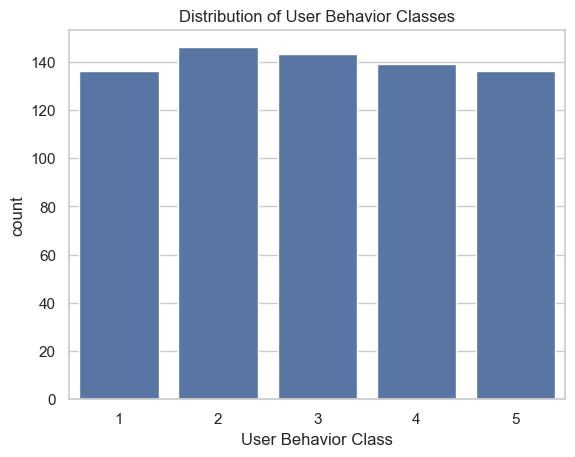

In [31]:
sns.countplot(x='User Behavior Class', data=df)
plt.title('Distribution of User Behavior Classes')
plt.show()

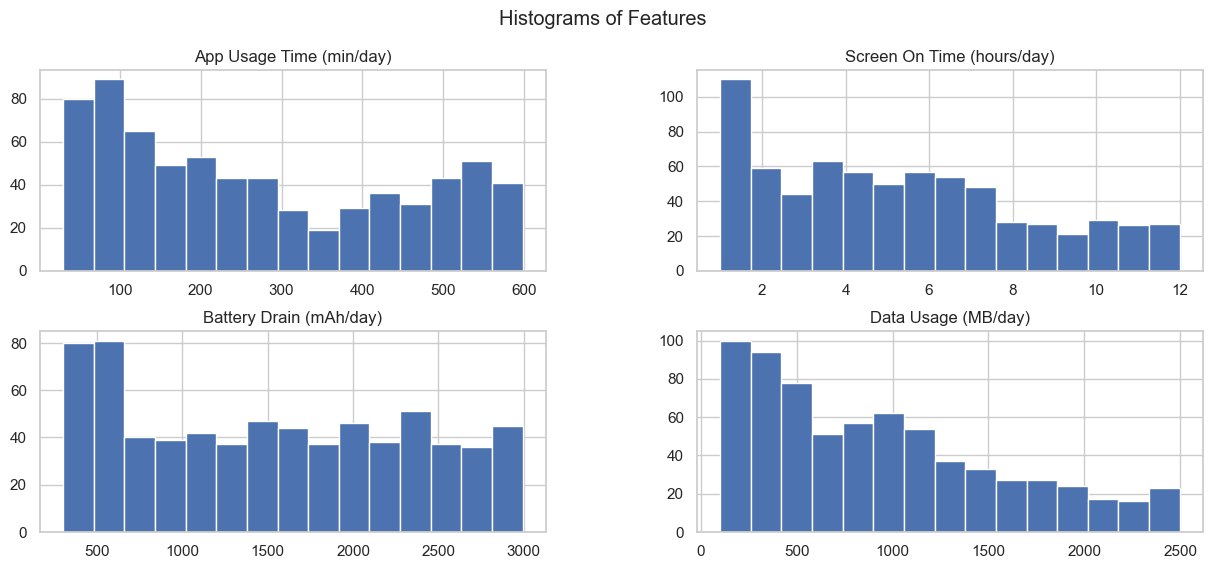

In [32]:
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
df[features].hist(bins=15, figsize=(15,6))
plt.suptitle('Histograms of Features')
plt.show()

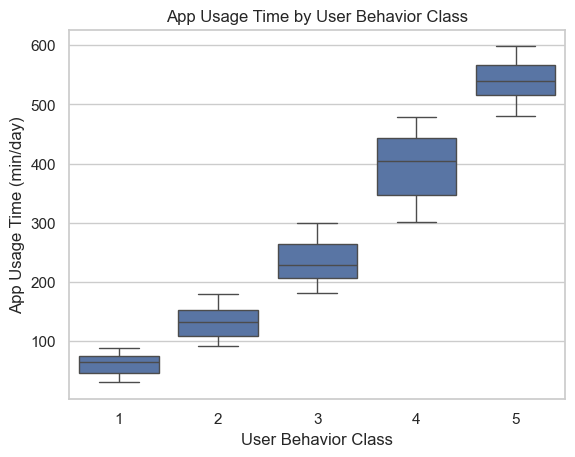

In [33]:
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by User Behavior Class')
plt.show()

In [34]:
df['Battery Drain per mAh/hours when screen is on'] = df['Battery Drain (mAh/day)'] / df['Screen On Time (hours/day)']
df['Data Usage (MB/app)'] = df['Data Usage (MB/day)'] / df['Number of Apps Installed']

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Battery Drain per mAh/hours when screen is on,Data Usage (MB/app)
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,292.500000,16.746269
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,283.191489,22.476190
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,190.250000,10.062500
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,349.166667,15.553571
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,317.906977,17.034483


In [35]:
test_df = df
#test_df = pd.get_dummies(df, columns=['Gender'])

test_df.head()
test_df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Battery Drain per mAh/hours when screen is on,Data Usage (MB/app)
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,292.500000,16.746269
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,283.191489,22.476190
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,190.250000,10.062500
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,349.166667,15.553571
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,317.906977,17.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,277.435897,14.653846
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,288.970588,17.661765
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,303.870968,20.772727
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,253.529412,17.230769


In [41]:
X = test_df.drop(columns=['User Behavior Class', 'User ID', 'Device Model', 'Operating System', 'Gender'])
y = test_df['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Seems like the data is perfect, and should probably not be used.

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
# Trying to make a new model, the data might be "too good to be true"
simple_model = LogisticRegression(max_iter=999999)
simple_model.fit(X_train, y_train)
y_pred = simple_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
# Get the weights of the different categories
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                                         Feature  Importance
2                        Battery Drain (mAh/day)    0.235476
0                       App Usage Time (min/day)    0.222109
3                       Number of Apps Installed    0.194144
4                            Data Usage (MB/day)    0.181513
1                     Screen On Time (hours/day)    0.145800
7                            Data Usage (MB/app)    0.016904
6  Battery Drain per mAh/hours when screen is on    0.003998
5                                            Age    0.000055


In [52]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


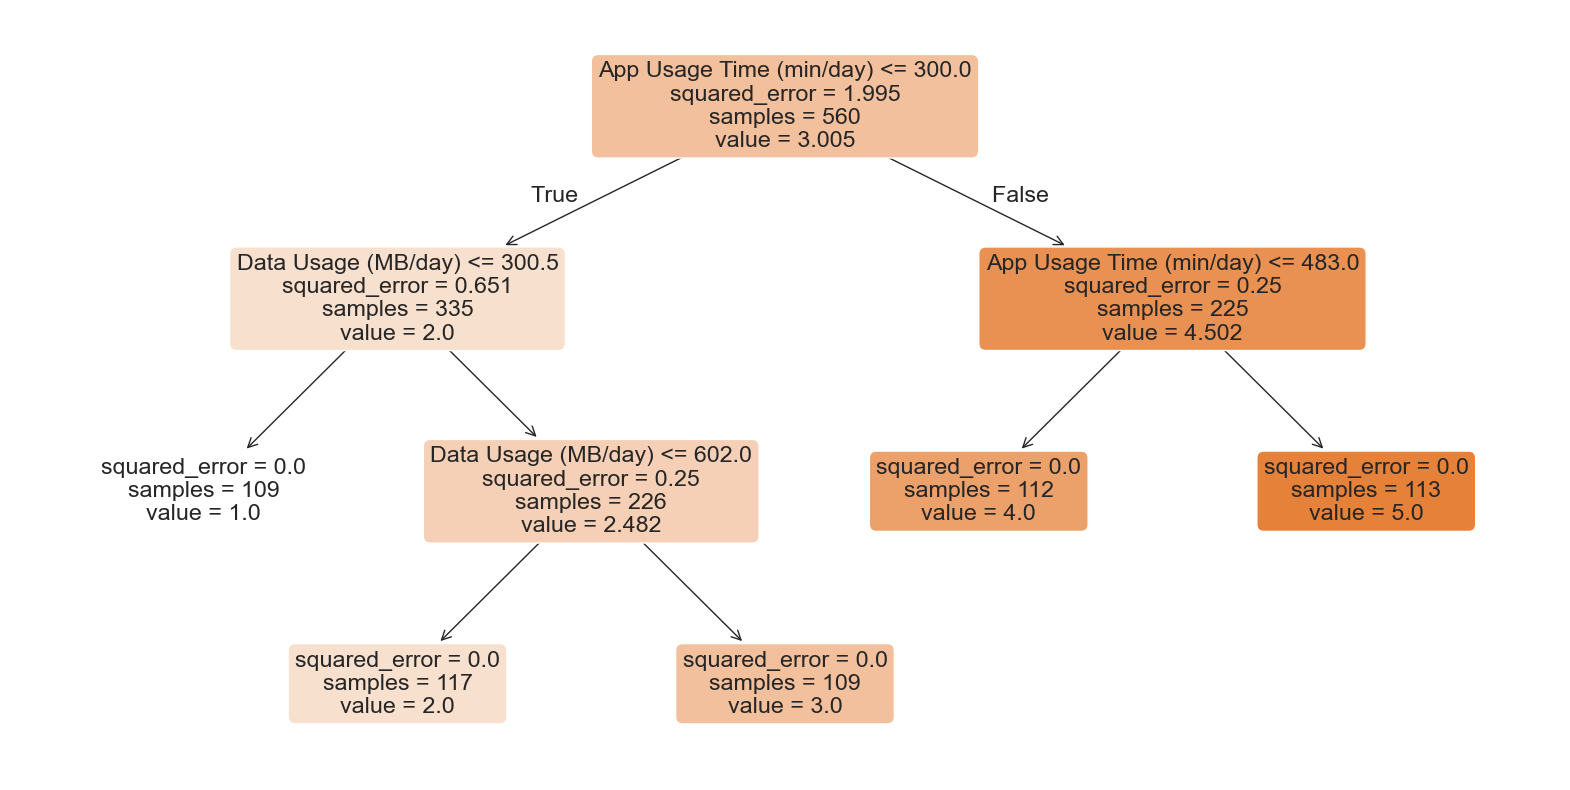

In [ ]:
# No any value for me in this section, desiced to keep it still for further studies.

tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()